### Megan Hoeksema

### Assignment 6 - Linear Regression

#### Packages

In [162]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from patsy import dmatrix
import seaborn as sns
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import SGDClassifier, LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

#### Data Import

In [7]:
healthDF = pd.read_csv('Health_Data.csv')
healthDF.head()

,age,income,illness,reduced,health
0,0.19,0.55,1,4,1
1,0.19,0.45,1,2,1
2,0.19,0.90,3,0,0
3,0.19,0.15,1,0,0
4,0.19,0.45,2,5,1


In [68]:
scaler = StandardScaler()
contCols = ['age', 'income', 'illness', 'reduced']
contCols
healthDF.loc[:,contCols] = scaler.fit_transform(healthDF.loc[:,contCols])
healthDF.head(5)

,age,income,illness,reduced,health
0,-1.056765,-0.089896,-0.312123,1.086862,1
1,-1.056765,-0.360993,-0.312123,0.394185,1
2,-1.056765,0.858945,1.132944,-0.298492,0
3,-1.056765,-1.174285,-0.312123,-0.298492,0
4,-1.056765,-0.360993,0.410410,1.433200,1


### Question 1

#### 1A. Implement batch gradient descent from scratch to find the regression parameters as in the pseudo code below

In [90]:
x = dmatrix('age + income + illness + reduced', healthDF)[:]
print(x)

[[ 1.         -1.05676475 -0.08989568 -0.31212329  1.08686168]
 [ 1.         -1.05676475 -0.36099305 -0.31212329  0.39418505]
 [ 1.         -1.05676475  0.85894511  1.13294351 -0.29849158]
 ...
 [ 1.         -0.17769577 -0.90318779 -0.31212329 -0.29849158]
 [ 1.          0.55486172  0.18120169 -1.03465669 -0.29849158]
 [ 1.          1.53160503 -0.90318779 -1.03465669 -0.29849158]]


In [70]:
target = healthDF['health']

In [124]:
b0 = 0
b1 = 0
b2 = 0
b3 = 0
b4 = 0

alpha = 0.01
iterations = 10000

x1 = np.array(x[:,0])
x2 = np.array(x[:,1])
x3 = np.array(x[:,2])
x4 = np.array(x[:,3])
y = np.array(target)

n = len(healthDF)

for i in range(iterations):
    predicted_y = b0 + b1 * x1 + b2 * x2 + b3 * x3 + b4 * x4
    errors =  y - predicted_y
    b0 = b0 + alpha * (1/n) * sum(errors)
    b1 = b1 + alpha * (1/n) * sum(errors * x1)
    b2 = b2 + alpha * (1/n) * sum(errors * x2)
    b3 = b3 + alpha * (1/n) * sum(errors * x3)
    b4 = b4 + alpha * (1/n) * sum(errors * x4)

print(b0, b1, b2, b3, b4)

0.608766859344893 0.608766859344893 -0.14917432015656173 -0.10664739711333239 0.7796034586172929


#### 1B. Now, use a vectorized or matrix implementation instead of having a line of code for each x or b. That mean, you can a create a vector of b’s and a feature matrix, X where you have an additional column for x0 whose values are 1’s. x0 corresponds to b0. You can still implement it as described in the code above. 

In [126]:
b = np.array([0, 0, 0, 0, 0])

alpha = 0.01
iterations = 10000

n = len(healthDF)

for i in range(iterations):
    predicted_y = b[0] + b[1] * x[:,0] + b[2] * x[:,1]  + b[3] * x[:,2] + b[4] * x[:,3]
    errors =  y - predicted_y
    b[0] = b[0] + alpha * (1/n) * sum(errors)
    b[1] = b[1] + alpha * (1/n) * sum(errors * x[:,0])
    b[2] = b[2] + alpha * (1/n) * sum(errors * x[:,1])
    b[3] = b[3] + alpha * (1/n) * sum(errors * x[:,2])
    b[4] = b[4] + alpha * (1/n) * sum(errors * x[:,3])
print(b)

[0 0 0 0 0]


#### 1C. Use the scikit-learn package to implement the stochastic gradient descent to find the parameters of the regression equation.

In [98]:
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(x, y)
clf.coef_

/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([[ 0.37107128,  0.35086981, -1.12985899, -1.72448836, -0.62482646],
       [ 1.85535641, -0.69213038,  0.74863916, -0.31098855, -1.06787307],
       [ 2.96857026,  0.12489214,  1.41309905,  0.41399706,  0.1420364 ],
       [ 2.96857026, -0.32815961, -0.5284124 ,  0.14588566,  0.91313362],
       [ 2.59749898, -0.24409974, -0.35421967,  0.26170565, -0.26126675],
       [ 2.96857026, -0.74496721, -0.41775631, -0.12222573, -0.2435122 ],
       [ 2.96857026, -0.83557756, -0.44793525,  0.68210845, -0.75757701],
       [ 3.33964155, -0.55719603, -0.01854929,  0.29817707,  0.28830716],
       [ 1.48428513, -0.53558223, -0.3748623 ,  0.07294283, -0.95711142],
       [ 3.33964155,  0.16768676, -0.66236656, -0.23804572, -0.99685487],
       [ 6.67928309, -0.22641064,  0.55642047, -0.20798005, -1.22261252],
       [ 4.08178411, -0.9427806 ,  0.43783684, -0.7377971 , -0.57579716],
       [ 3.33964155, -0.52095189, -0.23986147,  0.03006567, -1.38240347]])

### Question 2
You will implement a multiple regression from a statistical perspective to explore the relationship between the input variables and the output variable. You will use the health data again.  

#### 2A. Use the statsmodels package (https://www.statsmodels.org/stable/regression.html#examples) to implement a multiple linear regression using the entire health data to get a more detailed regression summary. 


In [10]:
X = healthDF.drop(columns = ['health'])
y = healthDF['health']

In [12]:
feature_matrix = sm.add_constant(X, prepend=False)
model = sm.OLS(y, feature_matrix)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 health   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     282.9
Date:                Sun, 06 Nov 2022   Prob (F-statistic):          2.35e-220
Time:                        08:07:50   Log-Likelihood:                -10762.
No. Observations:                5190   AIC:                         2.153e+04
Df Residuals:                    5185   BIC:                         2.157e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.8436      0.138     -6.120      0.0

#### 2B. Does the model fit the data overall? That is, do all the x’s overall explain a good amount of variance in health outcome? Use information from your results to support your answer.

No, the model does not fit the data well

#### 2C. Do age, income, illness and reduced variables individually  significantly predict health score? Use information from your summary of the regression results to support your answer.

No, the input variables do not significantly predict health score

#### 2D. Which variable is the best predictor of health score? Why? 

Illness is the best predictor of heath score because the coefficient is the highest among all the input variables at 0.49.

#### 2E. Extract the residuals of the model and test the assumptions normality and homogeneity of variance for the regression model. Are the assumptions met? Use reg.resid syntax to extract the residuals.

In [13]:
print(res.resid)

0      -0.692625
1      -0.404543
2      -1.949059
3      -1.173603
4      -1.374393
          ...   
5185   -0.539141
5186    0.717322
5187    0.006814
5188   -0.257493
5189   -0.203060
Length: 5190, dtype: float64


#### 2F. To further verify the normality assumption, create a histogram for the residuals. Does the histogram look like a normal distribution? 

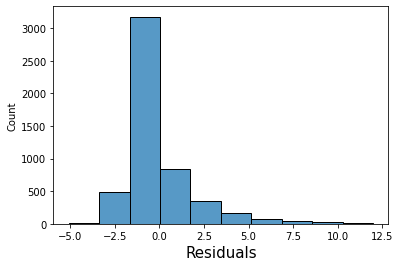

In [16]:
sns.histplot(res.resid, bins = 10) # you may select the no. of bins       
plt.xlabel('Residuals', fontsize = 15)     
plt.show()

#### 2G. Test the linearity assumption by creating separate scatter plots for each input variable versus output variable. According to your plots, are the linearity assumptions met? 

<AxesSubplot:xlabel='age', ylabel='health'>

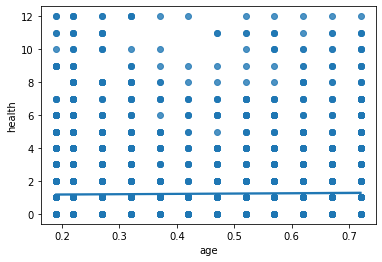

In [25]:
sns.regplot(X['age'], y)

<AxesSubplot:xlabel='income', ylabel='health'>

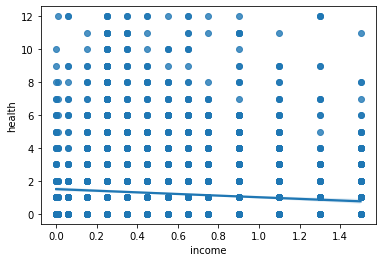

In [28]:
sns.regplot(X['income'], y)

<AxesSubplot:xlabel='illness', ylabel='health'>

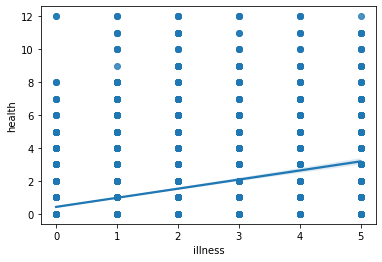

In [31]:
sns.regplot(X['illness'], y)

<AxesSubplot:xlabel='reduced', ylabel='health'>

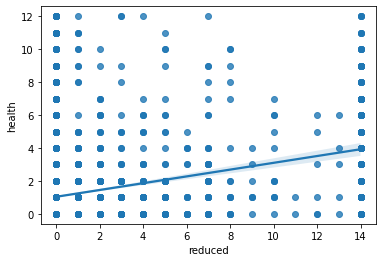

In [33]:
sns.regplot(X['reduced'], y)

#### 2H. Extract the predicted output values from the model, then create a scatter plot of the predicted output versus actual output (from the data provided). This plot is also used to evaluate the accuracy of the model. According to the plot, is your model good for predicting health scores? Use the reg.predict() method to extract the predicted values. 

In [38]:
pred = res.predict()
print(pred)

[1.69262487 1.40454262 1.9490591  ... 0.9931855  0.25749286 0.20305953]


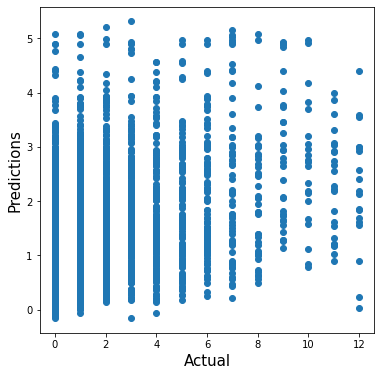

In [45]:
plt.figure(figsize=(6,6))
plt.scatter(y, pred)
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.show()

#### According to the plot, is your model good for predicting health scores?

No this is not a good model for predicting health sccores

#### 2I. Check for multi-collinearity by generating a covariance matrix for the input data . You can use the .cov() method of pandas (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.cov.html). Do you think there is multicollinearity among the input variables? 

In [49]:
healthDF.cov()

,age,income,illness,reduced,health
age,0.041936,-0.020478,0.058103,0.056026,0.008098
income,-0.020478,0.136092,-0.075987,-0.050648,-0.067230
illness,0.058103,-0.075987,1.915878,0.871793,1.058834
reduced,0.056026,-0.050648,0.871793,8.338398,1.718823
health,0.008098,-0.067230,1.058834,1.718823,4.512508


#### Do you think there is multicollinearity among the input variables?

No, the numbers are very low, indicating low collinearity.

### Question 3
Find your own dataset from an online source with at least 3 input variables. Here is a suggested source of data but you don’t have to use it: https://vincentarelbundock.github.io/Rdatasets/articles/data.html.  There should be one output variable of interest in the data. All the data used for analysis should be continuous. Clean the data as you find necessary, standardize the data and split it into training and test data using an appropriate split ratio. 

#### Data Loading

In [127]:
floridaDF = pd.read_csv('Florida.csv')
floridaDF.head()

,Unnamed: 0,GORE,BUSH,BUCHANAN,NADER,BROWNE,HAGELIN,HARRIS,MCREYNOLDS,MOOREHEAD,PHILLIPS,Total
0,ALACHUA,47300,34062,262,3215,658,42,4,658,21,20,86242
1,BAKER,2392,5610,73,53,17,3,0,0,3,3,8154
2,BAY,18850,38637,248,828,171,18,5,3,37,18,58815
3,BRADFORD,3072,5413,65,84,28,2,0,0,3,2,8669
4,BREVARD,97318,115185,570,4470,643,39,11,11,76,72,218395


In [134]:
X = floridaDF.drop(columns = ['Total', 'Unnamed: 0'])
y = floridaDF['Total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

#### 3A. Construct a linear regression model using ordinary least squares method by applying the .LinearRegression() constructor in sklearn and find the training and test accuracy of this model using mean square error (mse). https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [141]:
lr = LinearRegression()
lr.fit(X_train, y_train)
preds_train = lr.predict(X_train)
preds_test = lr.predict(X_test)

print('MSE of train: ' + str(mean_squared_error(y_train, preds_train)))
print('MSE of test: ' + str(mean_squared_error(y_test, preds_test)))

MSE of train: 1.411574724228127e-21
MSE of test: 1.5294569526105482e-21


#### 3B. Check for overfitting. Is there overfitting? Support your answer with some results you generated. 

Based on the MSE of the train and test sets, there is not overfitting.

#### 3C. Fit a lasso regression on the data and check the training and test accuracy of the model using mse. Use the default alpha or penalty constant. 

In [153]:
lasso = Lasso()
lasso.fit(X_train, y_train)
preds_train = lasso.predict(X_train)
preds_test = lasso.predict(X_test)

print('MSE of train: ' + str(mean_squared_error(y_train, preds_train)))
print('MSE of test: ' + str(mean_squared_error(y_test, preds_test)))

MSE of train: 75.05281339536005
MSE of test: 2651.748022970124


#### 3D. Fit a ridge regression on the data and check the training and test accuracy of the model. Use the default alpha or penalty constant.

In [148]:
ridge = Ridge()
ridge.fit(X_train, y_train)
preds_train = ridge.predict(X_train)
preds_test = ridge.predict(X_test)

print('MSE of train: ' + str(mean_squared_error(y_train, preds_train)))
print('MSE of test: ' + str(mean_squared_error(y_test, preds_test)))

MSE of train: 2.5069969289910966e-05
MSE of test: 0.004695511927247206


#### 3E. Which model is better, OLS, Lasso, or Ridge regression?

Linear Regression has the lowest MSE, indicating that the predicted values are close to true values

#### 3F. Tune the alpha hyperparameters of the lasso and ridge regression using any tuning technique of your choice? What is the best alpha value for the lasso regression and what is the best alpha value for the ridge regression?

In [167]:
param_grid = {'alpha': [0, 0.01, 0.1, 1.0]}

grid_search = GridSearchCV(lasso, param_grid)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_

/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserW

Lasso(alpha=0)

In [168]:
grid_search = GridSearchCV(ridge, param_grid)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_

Ridge(alpha=0)

#### What is the best alpha value for the lasso regression and what is the best alpha value for the ridge regression?

Using grid search, the best alpha value for both lasso and ridge is 0.